<a href="https://colab.research.google.com/github/uteThAn/baikiemtraBANH/blob/main/banh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
from keras_preprocessing import image
import cv2
import os
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.preprocessing import image

In [33]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
train = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/banh/train',
                                                 target_size = (150, 150),
                                                 batch_size = 12,
                                                 class_mode ='categorical')
vali_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
vali = vali_datagen.flow_from_directory('/content/drive/MyDrive/AI/banh/validition',
                                            target_size = (150, 150),
                                            batch_size = 12,
                                            class_mode = 'categorical')

Found 79 images belonging to 4 classes.
Found 12 images belonging to 4 classes.


In [34]:
print("Image Processing.......Compleated")
model = tf.keras.models.Sequential()
print("Building Neural Network.....")
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))
model.add(Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

Image Processing.......Compleated
Building Neural Network.....


In [35]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
print("Training cnn")
history=model.fit( train, validation_data = vali, batch_size = 64,
                            epochs=10,
                   callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience= 3,
            restore_best_weights=True
        )
    ])
                           
model.save("/content/drive/MyDrive/AI/banh.h5")

Training cnn
Epoch 1/10
7/7 [==============================] - 5s 610ms/step - loss: 3.0610 - accuracy: 0.2532 - val_loss: 1.3878 - val_accuracy: 0.2500
Epoch 2/10
7/7 [==============================] - 4s 552ms/step - loss: 1.5466 - accuracy: 0.3671 - val_loss: 1.3526 - val_accuracy: 0.3333
Epoch 3/10
7/7 [==============================] - 4s 557ms/step - loss: 1.2308 - accuracy: 0.4304 - val_loss: 1.2826 - val_accuracy: 0.4167
Epoch 4/10
7/7 [==============================] - 4s 549ms/step - loss: 0.9765 - accuracy: 0.5570 - val_loss: 1.2230 - val_accuracy: 0.4167
Epoch 5/10
7/7 [==============================] - 5s 683ms/step - loss: 0.7643 - accuracy: 0.6709 - val_loss: 0.7809 - val_accuracy: 0.9167
Epoch 6/10
7/7 [==============================] - 4s 548ms/step - loss: 0.5337 - accuracy: 0.7975 - val_loss: 0.6448 - val_accuracy: 0.8333
Epoch 7/10
7/7 [==============================] - 4s 556ms/step - loss: 0.4951 - accuracy: 0.7722 - val_loss: 0.5542 - val_accuracy: 0.8333
Epoch 8

In [38]:
score=model.evaluate(vali,verbose=1)
print("test loss = ",score[0])
print("test accuracy = ",score[1])

1/1 [==============================] - 0s 246ms/step - loss: 0.7673 - accuracy: 0.9167
test loss =  0.7673291563987732
test accuracy =  0.9166666865348816


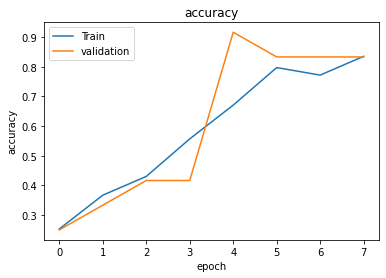

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

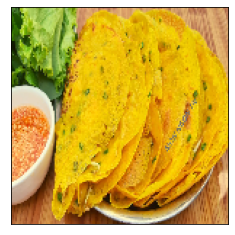

banh xèo


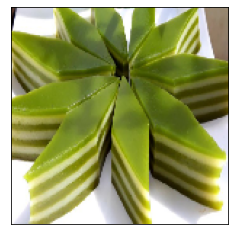

bánh da lon


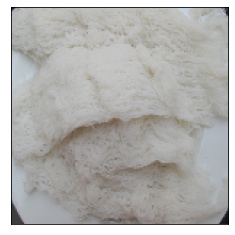

bánh hoi


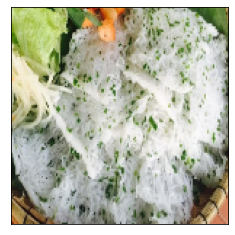

bánh hoi


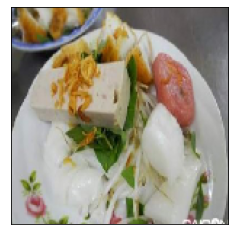

bánh hoi


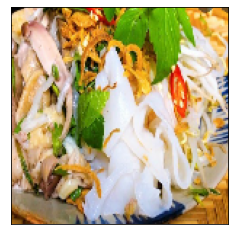

bánh uot


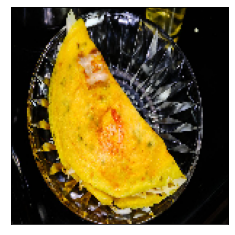

banh xèo


In [43]:
dir = '/content/drive/MyDrive/AI/banh/test'
for i in os.listdir(dir):
  img = load_img(dir +'//'+ i, target_size=(150,150))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.show()
  x= img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  val=np.argmax(model.predict(images))
  if val == 0:
    print("bánh da lon")
  if val == 1:
    print("bánh hoi")
  if val == 2:
    print("bánh uot")
  if val == 3:
    print("banh xèo")


In [12]:
train.class_indices

{'banhdalon': 0, 'banhhoi': 1, 'banhuot': 2, 'banhxeo': 3}